### Importação das Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import f1_score

### Carregamento do DataSet

In [2]:

df = pd.read_csv('data.csv')
df.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


### Verificação de células nulas no DataSet

In [3]:

df.isnull().sum()

user_id                  0
gender                   0
age                      0
country                  0
subscription_type        0
listening_time           0
songs_played_per_day     0
skip_rate                0
device_type              0
ads_listened_per_week    0
offline_listening        0
is_churned               0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 750.1+ KB


### Qual é quantidade de usuário por sexo?

In [5]:

quantidade_por_sexo = df['gender'].value_counts()
print(f'A quntidade de uauário por sexo é: {quantidade_por_sexo}')

A quntidade de uauário por sexo é: gender
Male      2691
Female    2659
Other     2650
Name: count, dtype: int64


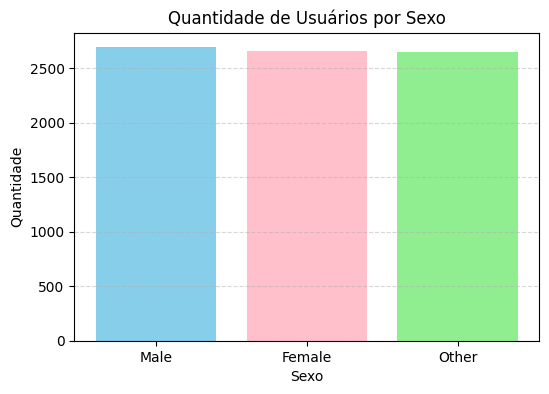

In [6]:
cores = ['skyblue', 'pink', 'lightgreen']

plt.figure(figsize=(6,4))
plt.bar(quantidade_por_sexo.index, quantidade_por_sexo.values, color=cores)
# for i, v in enumerate(quantidade_por_sexo.values):
# plt.text(i, v + 1, str(v), ha='center')
plt.title('Quantidade de Usuários por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

###  Qual é a média em minutos que os usuários ouvem por dia?

In [7]:
media_consumo_diario = df['listening_time'].mean()
print(f"A média de consumo por dia em minutos é: {media_consumo_diario:.2f}")

A média de consumo por dia em minutos é: 154.07


### Qual é a quantidade de usuários por país?

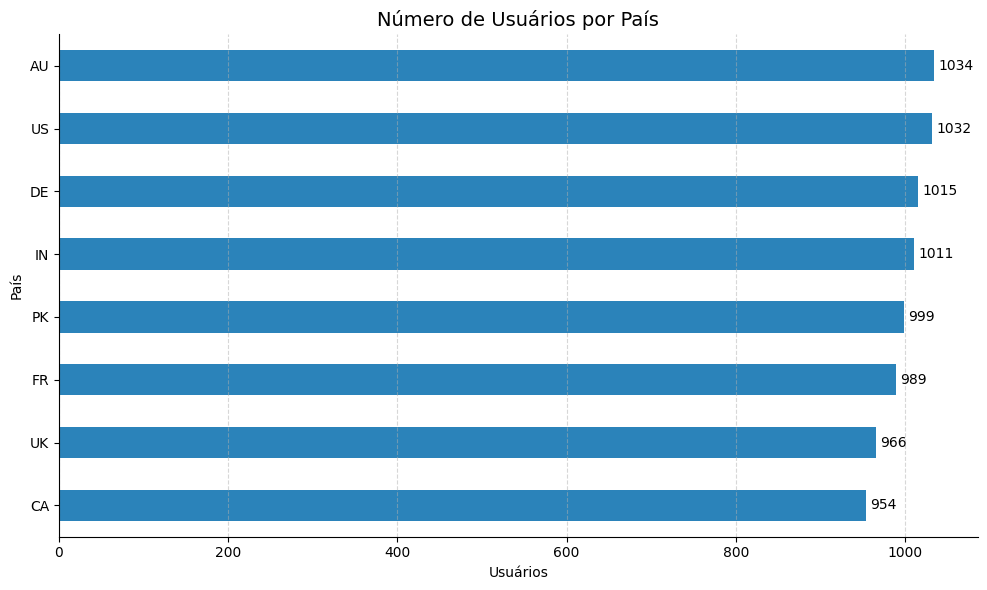

In [44]:

usuarios_por_pais = df.groupby('country')['user_id'].nunique().sort_values(ascending=True)

valor_minimo = usuarios_por_pais.max()

plt.figure(figsize=(10, 6))
eixo = usuarios_por_pais.plot(kind='barh', color = '#2b83ba')

eixo.bar_label(eixo.containers[0], padding=3)

eixo.spines['right'].set_visible(False)
eixo.spines['top'].set_visible(False)

plt.title("Número de Usuários por País", fontsize=14)
plt.xlabel("Usuários")
plt.ylabel("País")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.xlim(0, valor_minimo * 1.05)

plt.show()

### Qual é a média de músicas tocadas por dia?

In [5]:
media_de_musicas_dia=df['songs_played_per_day'].mean() 

print(f"A média de músicas tocadas por dia é: {media_de_musicas_dia}")

A média de músicas tocadas por dia é: 50.12725


### Qual tipo de device é mais utilizado?

In [10]:
device_mais_utilizado=df['device_type'].value_counts().idxmax() 

print(f"O device mais utilizado é: {device_mais_utilizado}")




O device mais utilizado é: Desktop


### Qual é a distribuição do tipo de assinatura por sexo e país?

In [11]:
df = df.rename(columns={'gender': 'sexo','country': 'país','subscription_type': 'tipo_de_assinatura'})
distribuicao= df.groupby(['sexo', 'país', 'tipo_de_assinatura']).size().reset_index(name='contagem')
print(f"{distribuicao}")

      sexo país tipo_de_assinatura  contagem
0   Female   AU             Family        96
1   Female   AU               Free        79
2   Female   AU            Premium        99
3   Female   AU            Student       105
4   Female   CA             Family        69
..     ...  ...                ...       ...
91   Other   UK            Student        73
92   Other   US             Family        86
93   Other   US               Free        89
94   Other   US            Premium        88
95   Other   US            Student        72

[96 rows x 4 columns]


### Qual é a média de idade no geral entre os usuários?

In [12]:
media_idade_total = df['age'].mean()
print(f"A média de idade geral de idade dos usuários é: {media_idade_total:.2f}")

A média de idade geral de idade dos usuários é: 37.66


### Qual é a média de idade por sexo?

In [13]:
media_idade_sexo = df.groupby('sexo')['age'].mean()
print("A media de idade por sexo é: ")
print(media_idade_sexo)

A media de idade por sexo é: 
sexo
Female    37.898834
Male      37.500557
Other     37.588679
Name: age, dtype: float64


### Qual é a relação entre a variável *age* e *device_type*?

Média e desvio padrão da idade: 
                  mean        std
device_type                      
Desktop      37.896688  12.856194
Mobile       37.687957  12.766210
Web          37.388105  12.590192


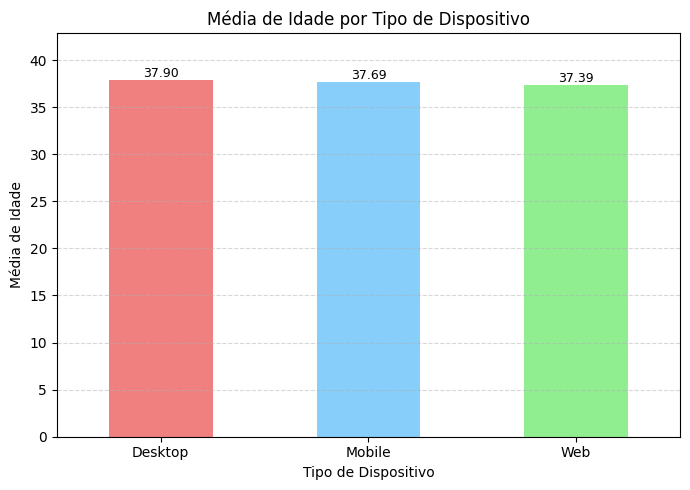

In [54]:
relacao_age_device = df.groupby('device_type')['age'].agg(['mean', 'std'])
print("Média e desvio padrão da idade: ")
print(relacao_age_device)

media_age_device = relacao_age_device['mean']

plt.figure(figsize=(7,5))

bar_plot = media_age_device.plot(kind='bar', color=['lightcoral', 'lightskyblue', 'lightgreen'])

media_age_device.plot(kind='bar', color=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.title("Média de Idade por Tipo de Dispositivo")
plt.xlabel("Tipo de Dispositivo")

plt.ylim(0, media_age_device.max() + 5)

for i, v in enumerate(media_age_device.values):
    bar_plot.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom', fontsize=9)

plt.ylabel('Média de Idade')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()